In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp

from aeons.utils import *
from aeons.endpoint import EndModel
from anesthetic.examples.perfect_ns import planck_gaussian
from aeons.plotting import *

### Function to find current beta

In [128]:
samples = pickle_in(f"{aeons_dir}/samples/toy/planck.pickle")
ndead = 10000
points = points_at_iteration(samples, ndead)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


In [126]:
def find_betadone(points, ndead, epsilon=1e-3):
    def func(beta):
        points_beta = points.set_beta(beta)
        logZdead = logsumexp(points_beta.logw().iloc[:ndead])
        logZlive = logsumexp(points_beta.logw().iloc[ndead:])
        return np.square(-np.log(epsilon) - np.log(1 + np.exp(logZdead - logZlive)))
    N = 100
    funcs = np.zeros(N)
    logbetas = np.linspace(-15, 0, 100)
    betas = np.exp(logbetas)
    for i, beta in enumerate(betas):
        funcs[i] = func(beta)
    grad = np.gradient(funcs)
    index = ((grad[1:] * grad[:-1]) < 0).nonzero()
    beta_done = betas[index]
    return beta_done

def navgs(iterations, nk, nlive):
    navgs = np.zeros_like(iterations)
    for i, ndead in enumerate(iterations):
        navgs[i] = np.mean(nk[int(ndead):-nlive])
    return navgs

In [168]:
beta = find_betadone(points, ndead)
beta

array([9.68425356e-05])

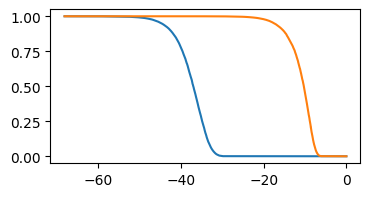

In [171]:
plt.figure(figsize=(4,2))
plt.plot(samples.logX(), np.exp(samples.logL - samples.logL.max()))
plt.plot(samples.logX(), np.exp(beta*samples.logL - beta*samples.logL.max()))

In [166]:
points.logX().iloc[ndead]

-16.154892080718145

In [167]:
EndModel(points).true_logXf()

-15.815183962175707

### Extrapolate beta

#### `planck_gaussian`

In [158]:
samples = pickle_in(f"{aeons_dir}/samples/toy/planck.pickle")

In [160]:
_, samples = get_samples('lcdm', 'planck')

In [161]:
samples

,,omegabh2,omegach2,theta,tau,logA,ns,calPlanck,acib217,xi,asz143,...,fsigma8z233,sigma8z233,chi2_plik,chi2_lowl,chi2_simall,chi2_prior,chi2_CMB,logL,logL_birth,nlive
,labels,$\Omega_b h^2$,$\Omega_c h^2$,$100\theta_{MC}$,$\tau$,${\rm{ln}}(10^{10} A_s)$,$n_s$,$y_{\rm cal}$,$A^{CIB}_{217}$,$\xi^{tSZ-CIB}$,$A^{tSZ}_{143}$,...,$f\sigma_8(2.33)$,$\sigma_8(2.33)$,$\chi^2_{\rm plik}$,$\chi^2_{\rm lowl}$,$\chi^2_{\rm simall}$,$\chi^2_{\rm prior}$,$\chi^2_{\rm CMB}$,$\ln\mathcal{L}$,$\ln\mathcal{L}_\mathrm{birth}$,$n_\mathrm{live}$
,weights,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.019973,0.095208,1.032369,0.018819,3.656967,0.993428,0.996954,169.326408,0.414624,1.347034,...,0.384997,0.404174,1.267083e+06,198.840318,406.423748,3.291984,1.267688e+06,-633845.601582,-inf,10000
1,0.000000,0.021405,0.099244,1.033097,0.015206,3.666862,1.020030,0.998603,189.883616,0.987761,0.682023,...,0.393006,0.411120,1.246923e+06,167.801194,407.641676,5.997219,1.247499e+06,-623752.332835,-inf,9999
2,0.000000,0.021952,0.106013,1.032276,0.028494,3.692408,1.023358,1.001454,132.878046,0.132130,0.266597,...,0.402966,0.418460,1.177777e+06,156.668109,401.821152,3.849184,1.178335e+06,-589169.635191,-inf,9998
3,0.000000,0.024678,0.099131,1.035361,0.014369,3.660554,1.018280,1.002693,190.514011,0.995038,7.909737,...,0.387326,0.406824,1.174217e+06,170.510849,408.172061,3.574658,1.174796e+06,-587399.815381,-inf,9997
4,0.000000,0.024377,0.096904,1.032957,0.036216,3.692154,1.009631,0.997986,139.048176,0.786495,9.189574,...,0.387733,0.407693,1.165281e+06,185.109792,399.610628,23.298579,1.165866e+06,-582944.703314,-inf,9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58370,0.018516,0.022332,0.120361,1.040718,0.056914,3.054043,0.965277,1.003165,49.034685,0.162502,5.542700,...,0.299122,0.308097,2.346985e+03,23.243352,396.695992,0.045839,2.766925e+03,-1383.485237,-1385.293552,5
58371,0.021465,0.022427,0.120078,1.040793,0.058397,3.052683,0.964655,1.000790,49.017806,0.434348,6.615296,...,0.298752,0.307814,2.345899e+03,23.543065,397.080219,0.152641,2.766522e+03,-1383.337470,-1384.842239,4


In [162]:
d = 26
beta = np.logspace(-10,0,100)
stats = samples.stats(5, beta=beta)

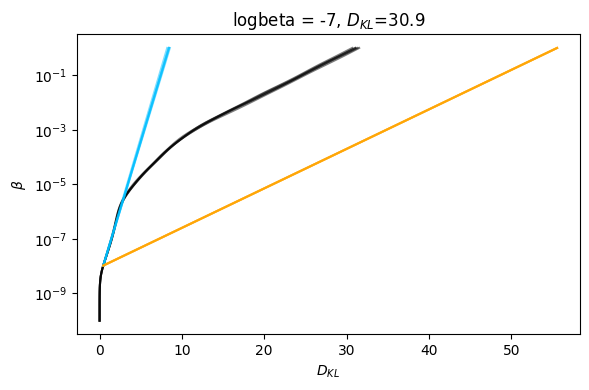

In [98]:
i = 20
b = beta[i]
plt.figure(figsize=(6,4))
plt.plot(stats.D_KL.unstack(), beta, label='C0', alpha=0.5, color='black')
plt.plot(stats.D_KL[b].values[None,:] + (stats.d_G[b]/2).values[None,:] * (np.log(beta[i:])-np.log(b))[:,None], beta[i:], alpha=0.5, color='deepskyblue')
plt.plot(stats.D_KL[b].values[None,:] + ((np.ones_like(beta[i:])*d/2) * (np.log(beta[i:])-np.log(b)))[:,None], beta[i:], alpha=0.5, color='orange')
plt.yscale('log')
plt.xlabel(r'$D_{KL}$')
plt.ylabel(r'$\beta$')

from scipy.interpolate import interp1d
interp = interp1d(beta, samples.D_KL(beta=beta))

plt.title(f"logbeta = {int(np.log10(b))}, $D_{{KL}}$={interp(1):.1f}")

plt.tight_layout()

#### `cauchy`

In [163]:
samples = pickle_in(f"{aeons_dir}/samples/toy/cauchy_10_0001.pickle")
model = EndModel(samples)
# plot_lx(samples)
# samples.D_KL()

In [169]:
d = 60
beta = np.logspace(-10,0,100)
stats = samples.stats(5, beta=beta)

/tmp/ipykernel_637511/289022627.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10**-3, 0)


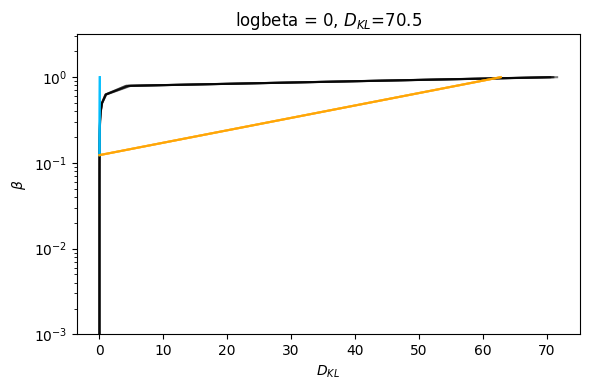

In [170]:
i = 90
b = beta[i]
plt.figure(figsize=(6,4))
plt.plot(stats.D_KL.unstack(), beta, label='C0', alpha=0.5, color='black')
plt.plot(stats.D_KL[b].values[None,:] + (stats.d_G[b]/2).values[None,:] * (np.log(beta[i:])-np.log(b))[:,None], beta[i:], alpha=0.5, color='deepskyblue')
plt.plot(stats.D_KL[b].values[None,:] + ((np.ones_like(beta[i:])*d/2) * (np.log(beta[i:])-np.log(b)))[:,None], beta[i:], alpha=0.5, color='orange')
plt.yscale('log')
plt.xlabel(r'$D_{KL}$')
plt.ylabel(r'$\beta$')
plt.ylim(10**-3, 0)

from scipy.interpolate import interp1d
interp = interp1d(beta, samples.D_KL(beta=beta))
plt.title(f"logbeta = {int(np.log10(b))}, $D_{{KL}}$={interp(1):.1f}")
plt.tight_layout()

#### `BAO`

In [116]:
name, samples = get_samples('lcdm', 'BAO')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()
d = 2
beta = np.logspace(-10,0,100)
stats = samples.stats(5, beta=beta)

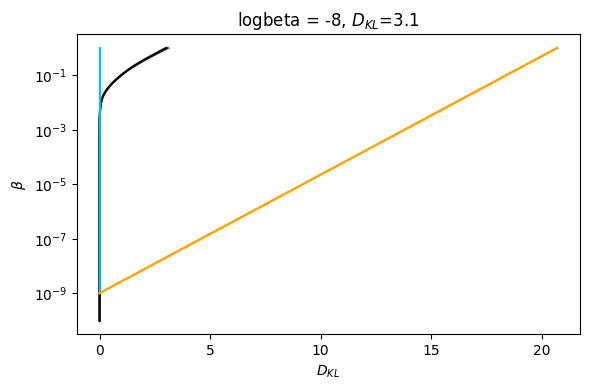

In [110]:
i = 10
b = beta[i]
plt.figure(figsize=(6,4))
plt.plot(stats.D_KL.unstack(), beta, label='C0', alpha=0.5, color='black')
plt.plot(stats.D_KL[b].values[None,:] + (stats.d_G[b]/2).values[None,:] * (np.log(beta[i:])-np.log(b))[:,None], beta[i:], alpha=0.5, color='deepskyblue')
plt.plot(stats.D_KL[b].values[None,:] + ((np.ones_like(beta[i:])*d/2) * (np.log(beta[i:])-np.log(b)))[:,None], beta[i:], alpha=0.5, color='orange')
plt.yscale('log')
plt.xlabel(r'$D_{KL}$')
plt.ylabel(r'$\beta$')

from scipy.interpolate import interp1d
interp = interp1d(beta, samples.D_KL(beta=beta))
plt.title(f"logbeta = {int(np.log10(b))}, $D_{{KL}}$={interp(1):.1f}")
plt.tight_layout()

In [155]:
ndead = 14000
points = points_at_iteration(samples, ndead)
points.logX().iloc[ndead]

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


-7.3001857554089025

In [156]:
find_betadone(points, ndead)

array([0.00912288])

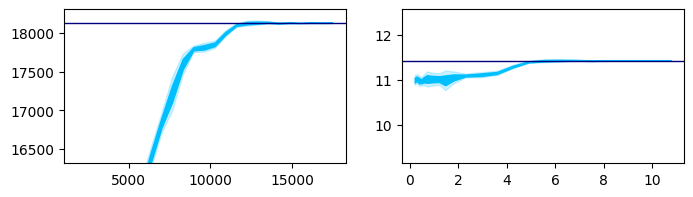

In [151]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
iterations, logXfs, logXfs_std = read_from_txt('BAO/bt_full_25.txt')
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=1000)
plot_std(-logXs, endpoints, endpoints_std, true_endpoint, ylim=(true_endpoint*0.9, true_endpoint*1.01), ax=axs[0])
plot_std(-logXs, -logXfs, logXfs_std, -true_logXf, ylim=(-true_logXf*0.8, -true_logXf*1.1), ax=axs[1])

### Back to DKL

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


<Axes: xlabel='beta'>

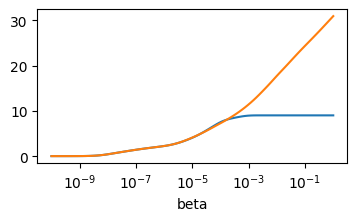

In [194]:
samples = pickle_in(f"{aeons_dir}/samples/toy/planck.pickle")
points = points_at_iteration(samples, ndead=2000)
betas = np.logspace(-10, 0, 100)
plt.figure(figsize=(4,2))
points.D_KL(beta=betas).plot(logx=True)
samples.D_KL(beta=betas).plot(logx=True)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


<Axes: xlabel='beta'>

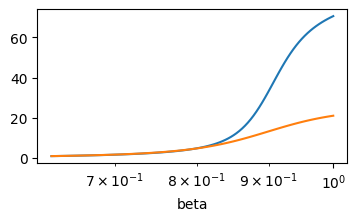

In [200]:
samples = pickle_in(f"{aeons_dir}/samples/toy/cauchy_10_0001.pickle")
points = points_at_iteration(samples, ndead=10000)
betas = np.logspace(-0.2, 0, 100)
plt.figure(figsize=(4,2))
samples.D_KL(beta=betas).plot(logx=True)
points.D_KL(beta=betas).plot(logx=True)